# Random Sample imputation for Categorical Data

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

# import dataset 

In [4]:
df = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])


In [6]:
df.sample(10)

,FireplaceQu,GarageQual,SalePrice
951,NaN,TA,119900
1014,Gd,TA,119200
26,NaN,TA,134800
268,Gd,Ex,120500
752,NaN,TA,217000
1104,NaN,TA,106000
261,Gd,TA,276000
182,Gd,TA,120000
432,NaN,TA,122500
1213,NaN,TA,145000


# check missing (null) value

In [7]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

# create x & y

In [9]:
x = df
y = df['SalePrice']

# Apply The Train Test Split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state= 2)

In [12]:
x_train

,FireplaceQu,GarageQual,SalePrice
554,Gd,TA,284000
1377,NaN,TA,117000
170,NaN,TA,128500
1199,Po,TA,148000
306,TA,TA,225000
...,...,...,...
466,Po,TA,167000
299,Gd,TA,158500
493,Fa,TA,155000
527,Gd,TA,446261


# New column create in Both Garage & Fire place

In [13]:

x_train['GarageQual_imputed'] = x_train['GarageQual']
x_test['GarageQual_imputed'] = x_test['GarageQual']
x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']

In [15]:
x_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1243,Gd,TA,465000,TA,Gd
1017,Ex,TA,187500,TA,Ex
491,TA,TA,133000,TA,TA
261,Gd,TA,276000,TA,Gd
1119,NaN,TA,133700,TA,NaN


# Replace Garage Value and Fireplace Imputed

In [18]:
# TRAIN
train_mask = x_train['FireplaceQu_imputed'].isnull()

x_train.loc[train_mask, 'FireplaceQu_imputed'] = (
    x_train['FireplaceQu']
    .dropna()
    .sample(train_mask.sum(), replace=True, random_state=42)
    .values
)

# TEST
test_mask = x_test['FireplaceQu_imputed'].isnull()

x_test.loc[test_mask, 'FireplaceQu_imputed'] = (
    x_train['FireplaceQu']
    .dropna()
    .sample(test_mask.sum(), replace=True, random_state=42)
    .values
)


In [19]:
# TRAIN
train_mask = x_train['GarageQual_imputed'].isnull()

x_train.loc[train_mask, 'GarageQual_imputed'] = (
    x_train['GarageQual']
    .dropna()
    .sample(train_mask.sum(), replace=True, random_state=42)
    .values
)

# TEST
test_mask = x_test['GarageQual_imputed'].isnull()

x_test.loc[test_mask, 'GarageQual_imputed'] = (
    x_train['GarageQual']
    .dropna()
    .sample(test_mask.sum(), replace=True, random_state=42)
    .values
)


In [21]:

temp = pd.concat(
[
x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna()),
x_train['GarageQual_imputed'].value_counts() / len(x_train)
],
axis=1)
temp.columns = ['original', 'imputed']
temp

,original,imputed
TA,0.941818,0.945205
Fa,0.043636,0.041096
Gd,0.010909,0.010274
Ex,0.003636,0.003425


# Review Frequency in Fireplace Original & Imputed

In [23]:

temp = pd.concat(
[
x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna()),
x_train['FireplaceQu_imputed'].value_counts() / len(df)
],
axis=1)
temp.columns = ['original', 'imputed']
temp

,original,imputed
Gd,0.485714,0.086986
TA,0.378571,0.082192
Po,0.064286,0.016438
Fa,0.050000,0.009589
Ex,0.021429,0.004795


# Compare category Fireplace before Imputation

C:\Users\Devendra kushwah\AppData\Local\Temp\ipykernel_14848\1627131804.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  for category in x_train['FireplaceQu'].dropna().unique(): sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Devendra kushwah\AppData\Local\Temp\ipykernel_14848\1627131804.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use

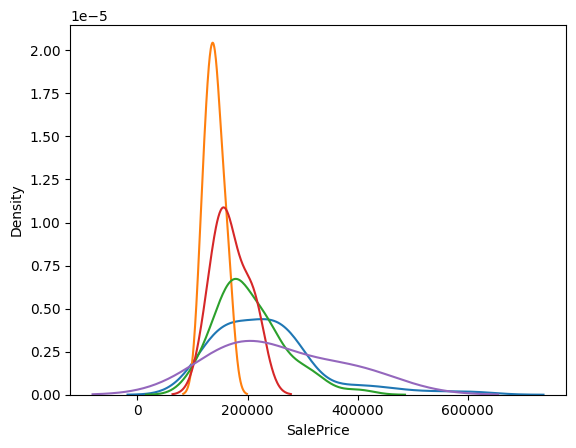

In [25]:

for category in x_train['FireplaceQu'].dropna().unique(): sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

# Compare category fireplace after Imputation

C:\Users\Devendra kushwah\AppData\Local\Temp\ipykernel_14848\1107343980.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  for category in x_train['FireplaceQu_imputed'].dropna().unique(): sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Devendra kushwah\AppData\Local\Temp\ipykernel_14848\1107343980.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating 

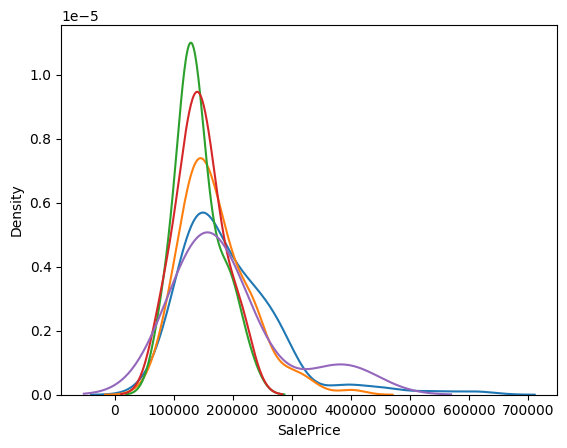

In [26]:

for category in x_train['FireplaceQu_imputed'].dropna().unique(): sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()